In [3]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.1 MB/s eta 0:00:00 0:00:01


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

In [5]:
URI = "neo4j+s://ae075b2d.databases.neo4j.io"
AUTH = ("neo4j", "LEmFVM-ZDBa4wv9YkZqQWBweUtSVcUJeoyM9ODaJEXc")
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

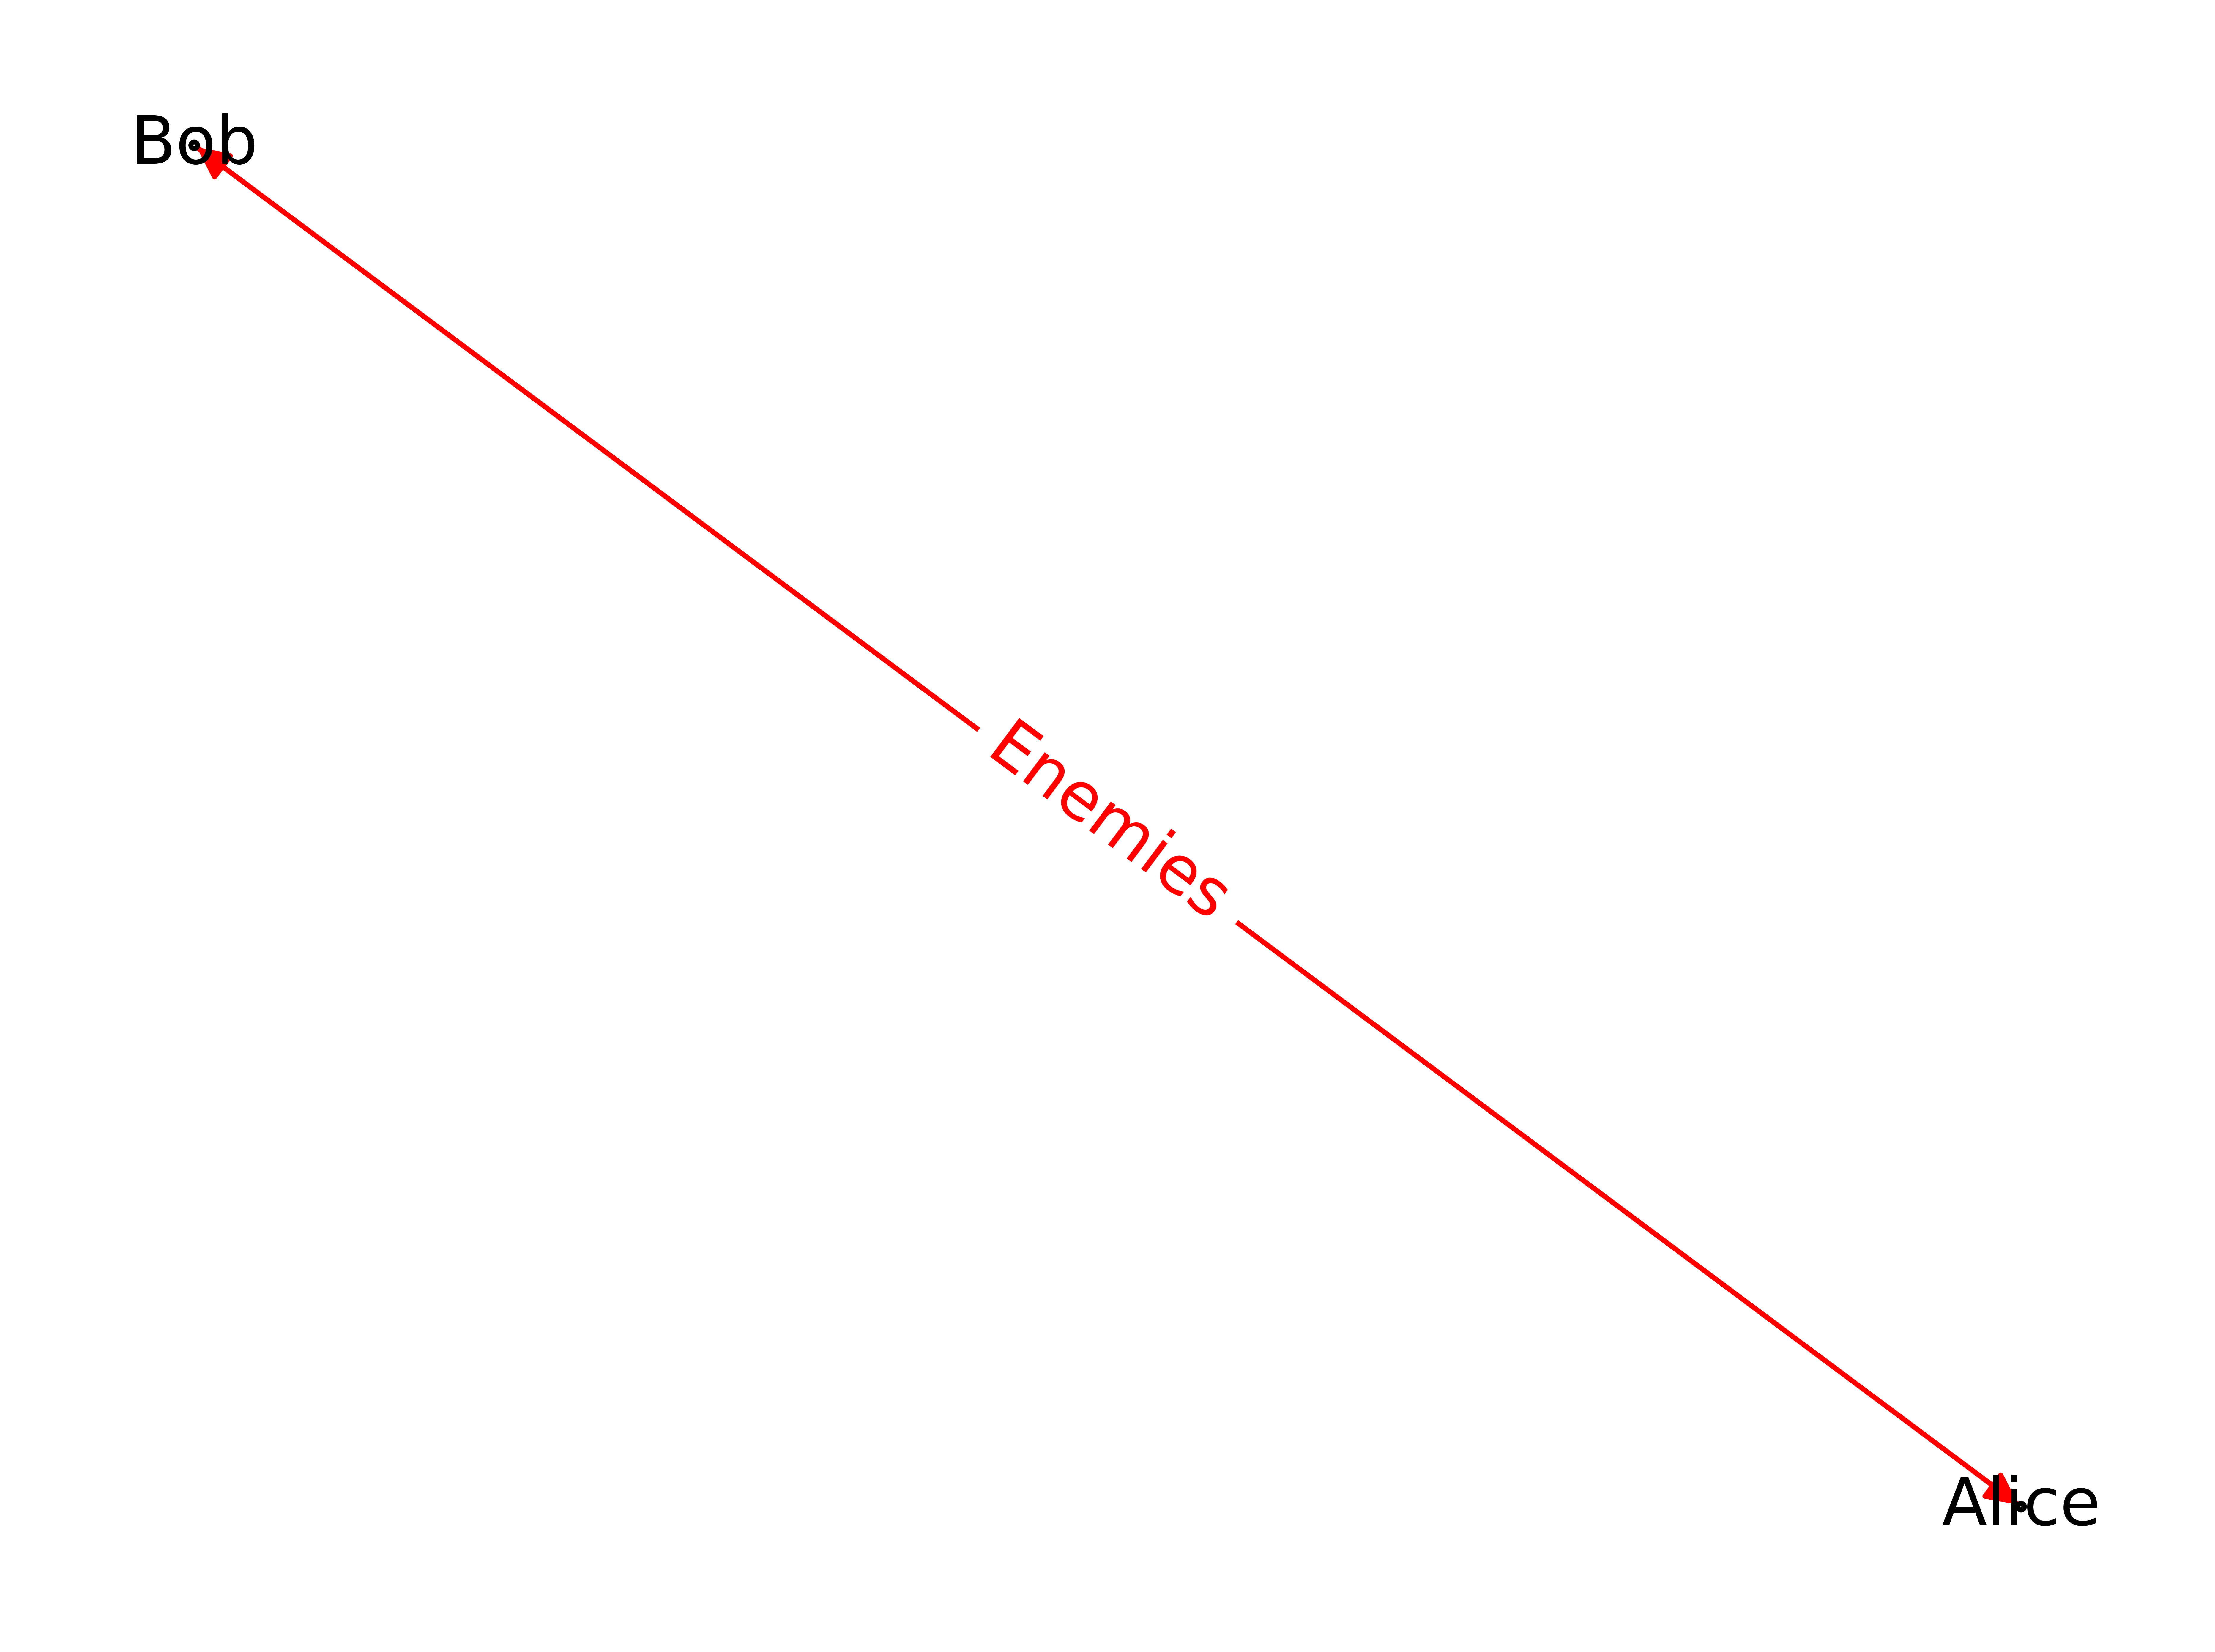

In [9]:
#credit: https://github.com/dhyeythumar/Knowledge-Graph-with-Neo4j/blob/main/visualization.py
def drawKnowledgeGraph(triplets:pd.DataFrame, font_size_of_node_vals:int, font_size_of_relation:int, size_of_node:int) -> None:
        k_graph = nx.from_pandas_edgelist(triplets, 'subject', 'object', create_using=nx.MultiDiGraph() )
        node_deg = nx.degree(k_graph)
        layout = nx.spring_layout(k_graph, k=15, iterations=20, scale=2)
        plt.figure(num=None, figsize=(120, 90), dpi=80)
        nx.draw_networkx(k_graph, 
            node_size=[int(deg[1]) * size_of_node for deg in node_deg],
            arrowsize=200,
            linewidths=15,
            width=15,
            pos=layout,
            edge_color='red',
            edgecolors='black',
            node_color='white',
        )
        labels = dict(zip(list(zip(triplets.subject, triplets.object)), triplets['relation'].tolist()))
        nx.draw_networkx_labels(k_graph,
                            pos=layout,
                            font_size=font_size_of_node_vals,  # Change this to adjust the font size inside nodes
                            font_color='black')

        nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels, font_color='red',font_size=font_size_of_relation )
        plt.axis('off')
        plt.show()
b=pd.DataFrame({'subject':['Alice', 'Bob'], 'object':['Bob', 'Laurence'], 'relation':['Friends', 'Enemies']})
drawKnowledgeGraph(b, 200,200,200)